# Employee Attrition analysis - visualisations

The four base hypotheses set for investigation are as follows:

- Hypothesis 1 - No one department has greater attrition than the others
- Hypothesis 2 - Commute distance has an impact on retention
- Hypothesis 3 - Younger employees are more likely to leave (CARE: how do you baseline this? Your older workers were once young and if they haven't job-hopped, this doesn't hold water)
- Hypothesis 4 - Job stagnation leads to attrition.


In [29]:
## Step 1 - Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ydata_profiling
from ydata_profiling import ProfileReport
import sklearn
%matplotlib inline

In [ ]:
#Step 2 - import cleaned data into dataframe
df = pd.read_csv(r'C:\Users\rache\.vscode\employee_attrition_analysis\Data files\HR_Attrition_Cleaned.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,RoleTenureRatio,ManagerTenureRatio,IncomeTenureRatio,IncomeTotalWorkRatio
0,41,Yes,Travel_Rarely,1102,Sales,1,2-College,Life Sciences,1,1,...,0,1-Bad,6,4,0,5,0.67,0.83,998.83,749.12
1,49,No,Travel_Frequently,279,Research & Development,8,1-Below College,Life Sciences,1,2,...,3,3-Better,10,7,1,7,0.70,0.70,513.00,513.00
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2-College,Other,1,4,...,3,3-Better,0,0,0,0,NaN,NaN,NaN,298.57
3,33,No,Travel_Frequently,1392,Research & Development,3,4-Master,Life Sciences,1,5,...,3,3-Better,8,7,3,0,0.88,0.00,363.62,363.62
4,27,No,Travel_Rarely,591,Research & Development,2,1-Below College,Medical,1,7,...,3,3-Better,2,2,2,2,1.00,1.00,1734.00,578.00


### Hypothesis 1 - no one department has greater attrition than the others.
To test this hypothesis we will look at the proportion of attrition per department rather than absolute numbers.

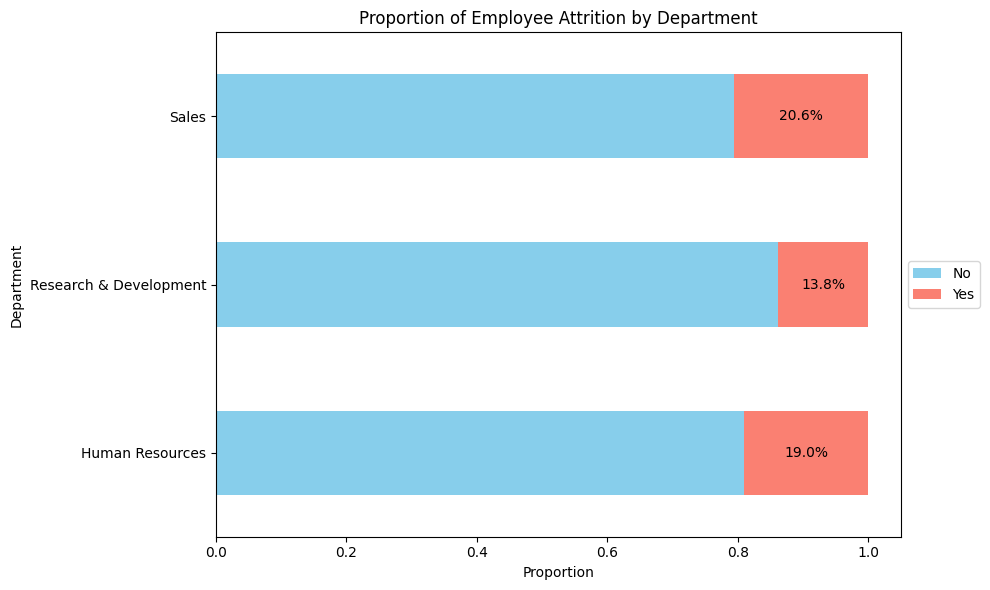

In [14]:
# Create the plot
attrition_counts = df.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
attrition_proportions = attrition_counts.div(attrition_counts.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 6))  # ⬅️ Wider figure to give space

attrition_proportions.plot(
    kind='barh',
    stacked=True,
    color=['skyblue', 'salmon'],
    ax=ax
)

ax.set_title('Proportion of Employee Attrition by Department')
ax.set_xlabel('Proportion')
ax.set_ylabel('Department')

# Annotate attrition % inside the "Yes" (salmon) segment
for index, (no_val, yes_val) in enumerate(zip(attrition_proportions['No'], attrition_proportions['Yes'])):
    x_pos = no_val + yes_val / 2
    ax.text(x_pos, index, f"{yes_val:.1%}", va='center', ha='center', color='black')

# Move legend outside the plot area
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))  # ⬅️ Push legend to the right

plt.tight_layout()  # ⬅️ Adjust layout to prevent clipping
plt.show()


This shows us that Research and Dev has the lowest attrition, and so consideration should be given (survey, focus groups?) to why working in R&D might result in greater job 'stickiness'.

Human resource and Sales have similar attrition that would warrant further investigation.

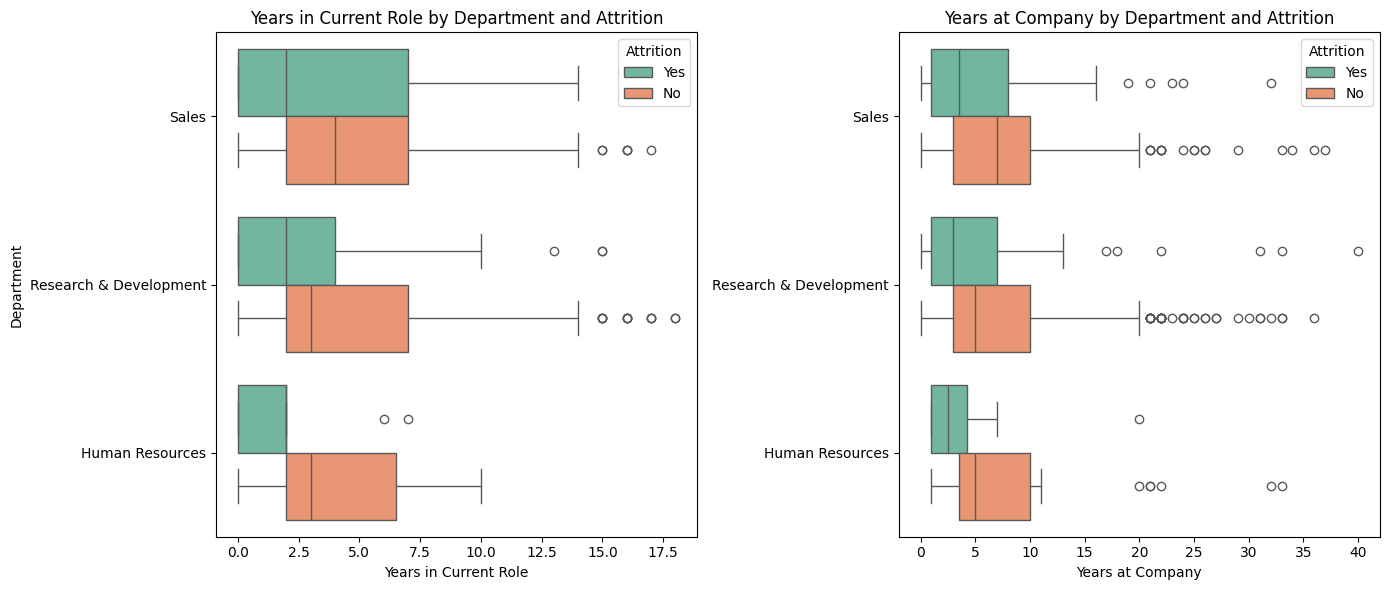

In [16]:
#compare years in current role and years at company by department to see if stagnation is a factor in attrition
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Boxplot 1: Years in Current Role
sns.boxplot(
    data=df,
    x='YearsInCurrentRole',
    y='Department',
    hue='Attrition',
    ax=axes[0],
    palette='Set2'
)
axes[0].set_title('Years in Current Role by Department and Attrition')
axes[0].set_xlabel('Years in Current Role')
axes[0].set_ylabel('Department')
axes[0].legend(title='Attrition', loc='upper right')

# Boxplot 2: Years at Company
sns.boxplot(
    data=df,
    x='YearsAtCompany',
    y='Department',
    hue='Attrition',
    ax=axes[1],
    palette='Set2'
)
axes[1].set_title('Years at Company by Department and Attrition')
axes[1].set_xlabel('Years at Company')
axes[1].set_ylabel('')  # Avoid repeating y-axis label
axes[1].legend(title='Attrition', loc='upper right')

plt.tight_layout()
plt.show()


What we see from the fist boxplot is that the lower quartile for all departments starts at or near 0. Therefore we have a non-trivial number of employees that have left within their first year in the role. This would indicate that either onboarding in new departments is something that might be improved, or interviewing/assessing individual for fit into new departments could be improved.

For years at company, this is similarly low for HR. That indicates that employees that join HR from outside the company and leave within the first year may be the same individuals that are in the first graph. 

As we saw on the previous graph, both HR & Sales have the higher levels of attrition. Combined with this box plot, this would indicate that the priority area for focus would be new-to-company starters in HR.

However, see 'additional insight' section after the main hypotheses for more detail on Sales that might also be a beneficial area for focus.

### Hypothesis 2 - Commute distance has an impact on retention



### Additional insight
Several other areas might be addressed by the business. 

The following graph shows attrition by job role. You will see that Sales Representative has a significantly higher attrition rate than other roles.

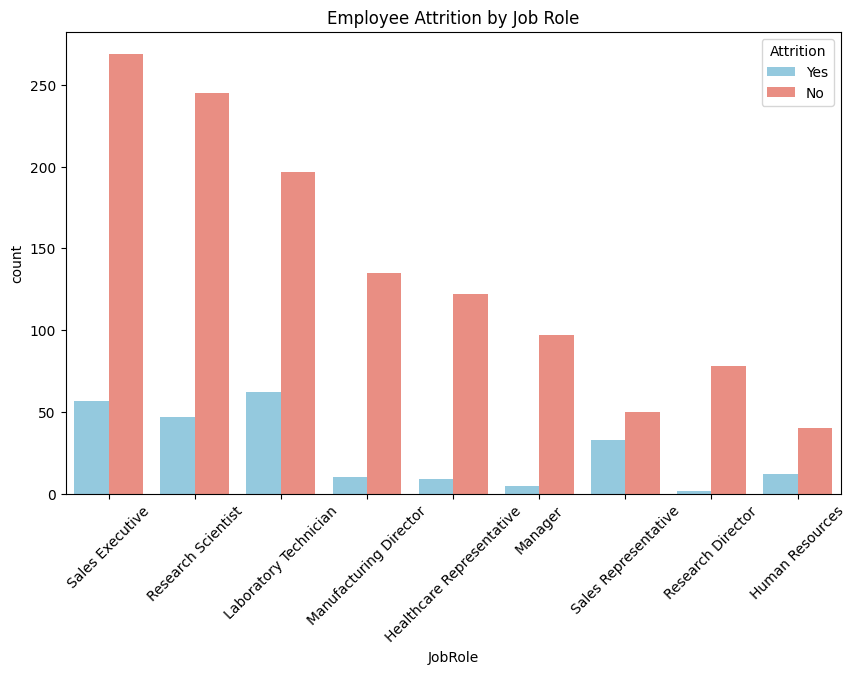

In [ ]:
#show percentage attrition per role
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobRole', hue='Attrition', palette=['skyblue', 'salmon'])
plt.title('Employee Attrition by Job Role')
plt.xticks(rotation=45)
plt.show()
#not working properly, fix before using, but interestin insight in the sales role

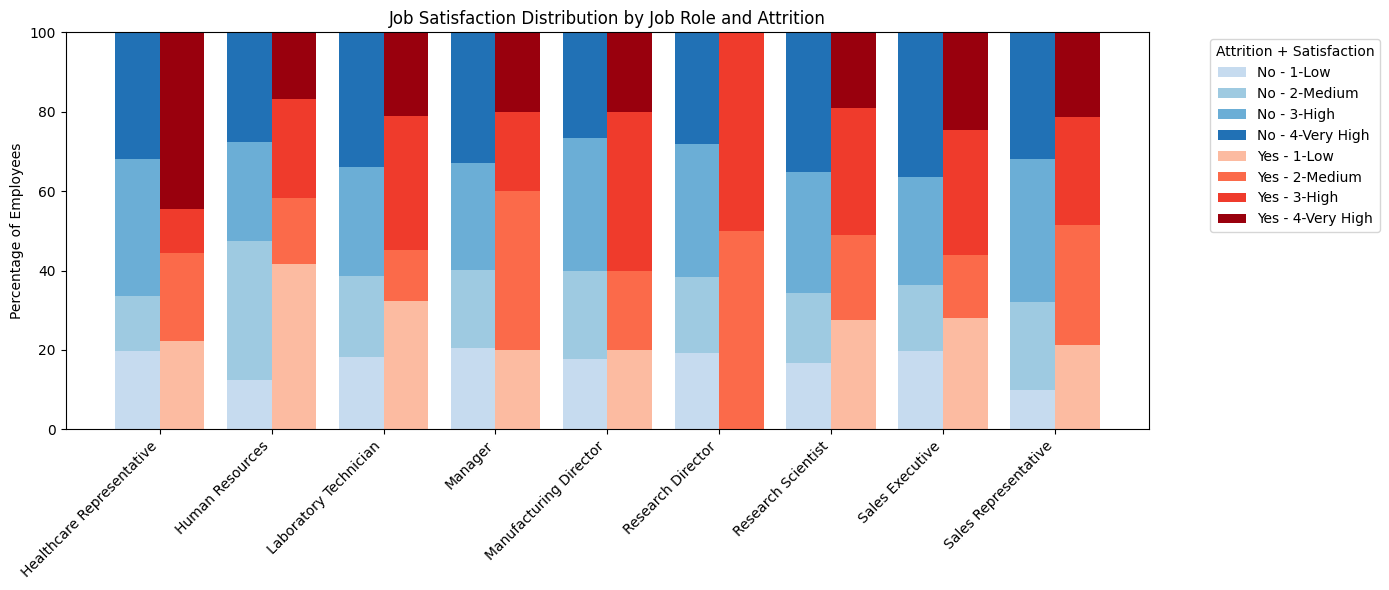

In [32]:
#plot ordinal job satisfaction levels against job roles split by attrition
# Define ordered satisfaction levels
satisfaction_levels = ['1-Low', '2-Medium', '3-High', '4-Very High']
df['JobSatisfaction'] = pd.Categorical(df['JobSatisfaction'], categories=satisfaction_levels, ordered=True)

# Group and count
grouped = (
    df.groupby(['JobRole', 'Attrition', 'JobSatisfaction'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Pivot to wide format
pivot = grouped.pivot_table(
    index=['JobRole', 'Attrition'],
    columns='JobSatisfaction',
    values='Count',
    fill_value=0
)

# Normalize to percentages
pivot_pct = pivot.div(pivot.sum(axis=1), axis=0) * 100

# Prepare plotting structure
job_roles = pivot_pct.index.get_level_values('JobRole').unique()
attrition_colors = {'No': ['#c6dbef', '#9ecae1', '#6baed6', '#2171b5'], 'Yes': ['#fcbba1', '#fb6a4a', '#ef3b2c', '#99000d']}

fig, ax = plt.subplots(figsize=(14, 6))
bar_width = 0.4
x_ticks = []
x_labels = []

for i, role in enumerate(job_roles):
    for j, attrition in enumerate(['No', 'Yes']):
        try:
            values = pivot_pct.loc[(role, attrition)]
        except KeyError:
            values = pd.Series([0] * len(satisfaction_levels), index=satisfaction_levels)
        bottom = 0
        xpos = i + (j - 0.5) * bar_width
        for k, level in enumerate(satisfaction_levels):
            ax.bar(
                xpos,
                values[level],
                bottom=bottom,
                width=bar_width,
                color=attrition_colors[attrition][k],
                label=f"{attrition} - {level}" if i == 0 else None  # only label once
            )
            bottom += values[level]
    x_ticks.append(i)
    x_labels.append(role)

# Axis and legend
ax.set_title('Job Satisfaction Distribution by Job Role and Attrition')
ax.set_ylabel('Percentage of Employees')
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, rotation=45, ha='right')
ax.legend(title='Attrition + Satisfaction', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



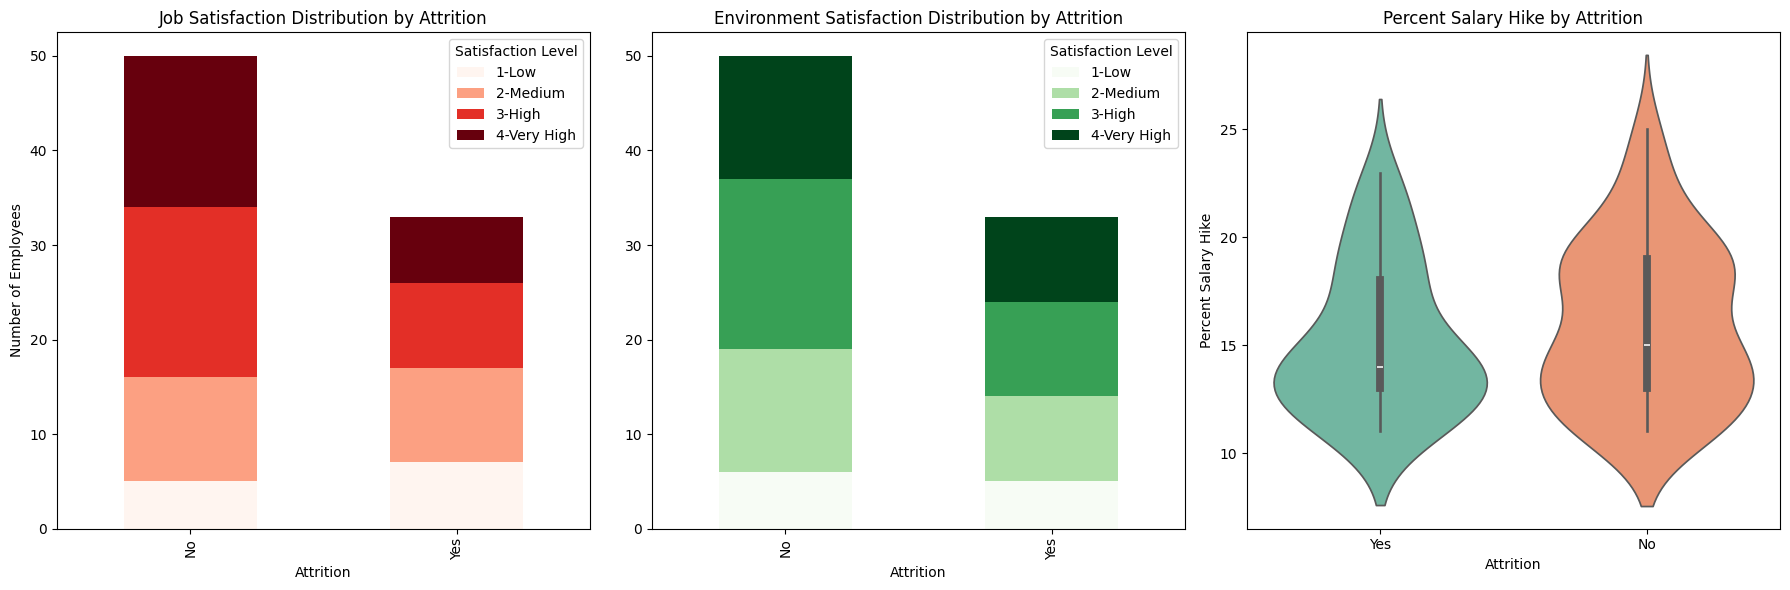

In [28]:
# Filter for Sales Representative role
sales_df = df[df['JobRole'] == 'Sales Representative'].copy()

# Define ordered satisfaction levels as strings
satisfaction_levels = ['1-Low', '2-Medium', '3-High', '4-Very High']
attrition_levels = ['No', 'Yes']

# ================================
# SECTION 1: Stacked Bar - Job Satisfaction
# ================================
job_sat_counts = (
    sales_df.groupby(['Attrition', 'JobSatisfaction'], observed=True)
    .size()
    .unstack(fill_value=0)
    .reindex(index=attrition_levels, columns=satisfaction_levels, fill_value=0)
)

# ================================
# SECTION 2: Stacked Bar - Environment Satisfaction
# ================================
env_sat_counts = (
    sales_df.groupby(['Attrition', 'EnvironmentSatisfaction'], observed=True)
    .size()
    .unstack(fill_value=0)
    .reindex(index=attrition_levels, columns=satisfaction_levels, fill_value=0)
)

# ================================
# SECTION 3: Violin Plot - Percent Salary Hike
# ================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Job Satisfaction stacked bar
job_sat_counts.plot(kind='bar', stacked=True, ax=axes[0], colormap='Reds')
axes[0].set_title('Job Satisfaction Distribution by Attrition')
axes[0].set_xlabel('Attrition')
axes[0].set_ylabel('Number of Employees')
axes[0].legend(title='Satisfaction Level', loc='upper right')

# Environment Satisfaction stacked bar
env_sat_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='Greens')
axes[1].set_title('Environment Satisfaction Distribution by Attrition')
axes[1].set_xlabel('Attrition')
axes[1].set_ylabel('')
axes[1].legend(title='Satisfaction Level', loc='upper right')

# Violin plot for PercentSalaryHike
sns.violinplot(
    data=sales_df,
    x='Attrition',
    y='PercentSalaryHike',
    hue='Attrition',  # fixes palette warning
    palette='Set2',
    ax=axes[2],
    inner='box',
    legend=False
)
axes[2].set_title('Percent Salary Hike by Attrition')
axes[2].set_xlabel('Attrition')
axes[2].set_ylabel('Percent Salary Hike')

plt.tight_layout()
plt.show()


Attrition distribution visual + observations

Summary stats visuals + observations

Additional tests - chi-squared, linear regression, ?Pearsons, and conclusions

Findings and recommendations summary